In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/ara_proje_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/benign/aug_0_5669.png  
  inflating: train/benign/aug_0_6396.png  
  inflating: train/benign/aug_0_821.png  
  inflating: train/benign/aug_0_4940.png  
  inflating: train/benign/aug_0_10.png  
  inflating: train/benign/aug_0_9248.png  
  inflating: train/benign/aug_0_6968.png  
  inflating: train/benign/aug_0_6599.png  
  inflating: train/benign/aug_0_6012.png  
  inflating: train/benign/aug_0_2732.png  
  inflating: train/benign/aug_0_6190.png  
  inflating: train/benign/aug_0_824.png  
  inflating: train/benign/aug_0_9575.png  
  inflating: train/benign/aug_0_9135.png  
  inflating: train/benign/aug_0_7581.png  
  inflating: train/benign/aug_0_9464.png  
  inflating: train/benign/aug_0_3309.png  
  inflating: train/benign/aug_0_8782.png  
  inflating: train/benign/aug_0_6508.png  
  inflating: train/benign/aug_0_5852.png  
  inflating: train/benign/aug_0_783.png  
  inflating: train/benign/aug_0_3259.png  
  inflat

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# --- 1. YENİ PARAMETRELER ---
DATA_ROOT = "/content/" # Olası kök dizin
IMAGE_SIZE = (224, 224)
NEW_LEARNING_RATE = 0.001
MAX_EPOCHS = 50
PATIENCE = 5
BATCH_SIZE = 32

# --- 2. CALLBACK'LERİN TANIMLANMASI ---

# 5 epoch boyunca val_loss iyileşmezse eğitimi durdur ve en iyi ağırlıkları geri yükle
early_stopping = EarlyStopping(
monitor='val_loss',
patience=PATIENCE,# Sabır değeri
restore_best_weights=True,# En iyi ağırlıkları yükle
verbose=1
)

# Her epoch sonunda en iyi val_loss değerine sahip ağırlıkları kaydet
checkpoint_filepath = '/tmp/nasnet_best_weights_lr0001.weights.h5'
model_checkpoint = ModelCheckpoint(
filepath=checkpoint_filepath,
monitor='val_loss',
save_best_only=True,
verbose=1
)

# --- 3. VERİ YÜKLEYİCİLERİ (DOĞRU NORMALİZASYON) ---
datagen_rescale = ImageDataGenerator(rescale=1./255) # 0-1 Normalizasyonu

train_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'train', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'valid', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (Feature Extraction) ---
base_model = NASNetLarge(weights='imagenet',
include_top=False,
pooling='avg',
input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

base_model.trainable = False

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. MODELİ DERLEME VE EĞİTİM ---
print(f"NASNet modeli LR={NEW_LEARNING_RATE} ile derleniyor...")

model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
loss='categorical_crossentropy',
metrics=['accuracy'])

print(f"\n--- NASNet Eğitimi Başlıyor (LR: {NEW_LEARNING_RATE}, Max Epoch: {MAX_EPOCHS}) ---\n")

history = model.fit(
train_generator,
epochs=MAX_EPOCHS,
validation_data=valid_generator,
callbacks=[early_stopping, model_checkpoint] # Callbacks eklendi
)

Found 7031 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
NASNet modeli LR=0.001 ile derleniyor...

--- NASNet Eğitimi Başlıyor (LR: 0.001, Max Epoch: 50) ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.5759 - loss: 0.8721
Epoch 1: val_loss improved from inf to 0.72472, saving model to /tmp/nasnet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 211s 634ms/step - accuracy: 0.5763 - loss: 0.8717 - val_accuracy: 0.6667 - val_loss: 0.7247
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.7479 - loss: 0.6239
Epoch 2: val_loss improved from 0.72472 to 0.71121, saving model to /tmp/nasnet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.7479 - loss: 0.6238 - val_accuracy: 0.7083 - val_loss: 0.7112
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7764 - loss: 0.5575
Epoch 3: val_loss improved from 0.71121 to 0.69607, saving model to /tmp/nasnet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.7764 - loss: 0.5575 - val_accuracy: 0.7000 - val_loss: 0.6961
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7839 - loss: 0.5278
Epoch 4: val_loss did not improve from 0.69607
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7839 - loss: 0.5278 - val_accuracy: 0.6917 - val_loss: 0.7079
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8007 - loss: 0.4970
Epoch 5: val_loss did not improve from 0.69607
220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.8007 - loss: 0.4970 - val_accuracy: 0.6917 - val_loss: 0.6995
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8072 - loss: 0.4976
Epoch 6: val_loss improved from 0.69607 to 0.69600, saving model to /tmp/nasnet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.8072 - loss: 0.4976 - val_accuracy: 0.7167 - val_loss: 0.6960
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8193 - loss: 0.4680
Epoch 7: val_loss improved from 0.69600 to 0.69140, saving model to /tmp/nasnet_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.8193 - loss: 0.4681 - val_accuracy: 0.6917 - val_loss: 0.6914
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8161 - loss: 0.4657
Epoch 8: val_loss did not improve from 0.69140
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8160 - loss: 0.4657 - val_accuracy: 0.7000 - val_loss: 0.6992
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8190 - loss: 0.4547
Epoch 9: val_loss did not improve from 0.69140
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8190 - loss: 0.4547 - val_accuracy: 0.6917 - val_loss: 0.7013
Epoch 10/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.8294 - loss: 0.4465
Epoch 10: val_loss did not improve from 0.69140
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.8293 - loss: 0.4465 - val_accuracy: 0.7000 - val_loss: 0.7051
Epoch 11/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.8240 - loss: 0.4423
Epoch 11: val_loss did not impr

In [4]:
# Eğitimin temel metriklerini yazdıralım
print("\n--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---")

# En iyi Validasyon Accuracy'i bulma
best_val_acc = max(history.history['val_accuracy'])
print(f"En Yüksek Validasyon Accuracy: {best_val_acc:.4f}")

# Sonuçları Training Seti üzerinde değerlendirelim
# Training Seti performansı (genellikle çok yüksektir)
train_results = model.evaluate(train_generator, verbose=0)
print(f"Training Seti Accuracy: {train_results[1]:.4f}")
print(f"Training Seti Loss: {train_results[0]:.4f}")


--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---
En Yüksek Validasyon Accuracy: 0.7167
Training Seti Accuracy: 0.8576
Training Seti Loss: 0.3941


Found 115 images belonging to 3 classes.

--- NASNet (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 79s 16s/step
Test Accuracy: 0.8522
Test Recall (Duyarlılık): 0.8779
Test Precision (Kesinlik): 0.8380
Test F1-Score: 0.8529


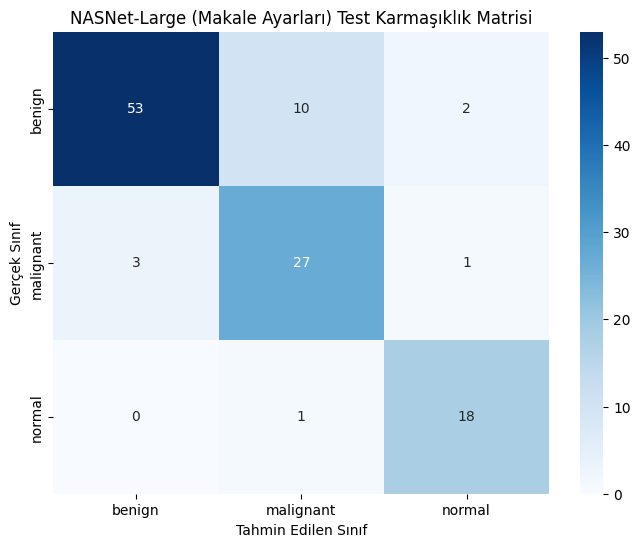


--- Tabloya Eklenecek Sonuçlar ---

NASNet-Large (Makale Ayarları) | Accuracy: 0.8522 | Recall: 0.8779 | Precision: 0.8380 | F1-Score: 0.8529

Karmaşıklık Matrisi (nasnet_makale_confusion_matrix.png) oluşturuldu.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1. TEST VERİ YÜKLEYİCİSİ (Normalizasyon: 0-1) ---
# Makale ayarlarına uygun olarak 0-1 normalizasyonunu kullanmalıyız.
datagen_test = ImageDataGenerator(rescale=1./255)

# Test generator'ı oluştur. Shuffle=False kritik!
test_generator = datagen_test.flow_from_directory(
    DATA_ROOT + 'test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Sınıfları doğru eşleştirmek için KARŞTIRMA KAPALI olmalı
)

# --- 2. TAHMİN VE METRİK HESAPLAMA ---

print("\n--- NASNet (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---\n")

test_steps = int(np.ceil(test_generator.samples / BATCH_SIZE))
y_pred_proba_test = model.predict(test_generator, steps=test_steps)
y_pred_test = y_pred_proba_test.argmax(axis=1) # Olasılıklardan en yüksek olanın indeksini al
y_true_test = test_generator.classes # Gerçek etiketleri al

# Sınıf isimlerini al (Örn: benign, malignant, normal)
class_labels = list(test_generator.class_indices.keys())

# Metrikler
accuracy_test = accuracy_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test, average='macro', zero_division=0)
precision_test = precision_score(y_true_test, y_pred_test, average='macro', zero_division=0)
f1_test = f1_score(y_true_test, y_pred_test, average='macro', zero_division=0)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Recall (Duyarlılık): {recall_test:.4f}")
print(f"Test Precision (Kesinlik): {precision_test:.4f}")
print(f"Test F1-Score: {f1_test:.4f}")

# --- 3. KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) OLUŞTURMA ---

cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('NASNet-Large (Makale Ayarları) Test Karmaşıklık Matrisi')
plt.savefig('nasnet_makale_confusion_matrix.png')
plt.show()

print("\n--- Tabloya Eklenecek Sonuçlar ---\n")
print(f"NASNet-Large (Makale Ayarları) | Accuracy: {accuracy_test:.4f} | Recall: {recall_test:.4f} | Precision: {precision_test:.4f} | F1-Score: {f1_test:.4f}")
print("\nKarmaşıklık Matrisi (nasnet_makale_confusion_matrix.png) oluşturuldu.")

In [8]:
# --- 1. BASE MODEL'İ TAMAMEN EĞİTİME AÇMA ---
# Önce tüm NASNet katmanlarını eğitilebilir yapıyoruz.
base_model.trainable = True

# --- 2. SADECE SON 100 KATMANI KORUMA AMAÇLI DONDURMA ---
# NASNetLarge'da yaklaşık 1000'den fazla katman vardır.
# Sadece son kısımları ince ayarlayarak çekirdeği koruyacağız.
unfreeze_layers_count = 100 # Sadece son 100 katmanı eğitime açıyoruz.

# İlk katmanları dondurma
for layer in base_model.layers[:-unfreeze_layers_count]:
    layer.trainable = False

# Son katmanları eğitime açma (Bu kısmı modelin kendisi yapacaktır)
for layer in base_model.layers[-unfreeze_layers_count:]:
    layer.trainable = True

print(f"NASNet'in ilk {len(base_model.layers) - unfreeze_layers_count} katmanı donduruldu.")
print(f"Son {unfreeze_layers_count} katman Fine-Tuning için eğitime açıldı.")

# --- 3. YENİ ULTRA DÜŞÜK ÖĞRENME ORANI TANIMLAMA ---
FINE_TUNE_LEARNING_RATE = 0.000005 # Önceki 1e-5'ten daha düşük (5e-6)
FINE_TUNE_EPOCHS = 50
PATIENCE = 10                   # Sabır süresini 10'a çıkaralım.

# --- 4. CALLBACK'leri Güncelleme ---
early_stopping.patience = PATIENCE
checkpoint_filepath_ft = '/tmp/nasnet_partial_fine_tune_best_weights.weights.h5'
model_checkpoint_ft = ModelCheckpoint(
    filepath=checkpoint_filepath_ft,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# --- 5. MODELİ YENİDEN DERLEME (RE-COMPILE) ---
# Yeni LR'yi ve katman ayarlarını uygulamak için.
print(f"NASNet modeli Partial Fine-Tuning için LR={FINE_TUNE_LEARNING_RATE} ile yeniden derleniyor...")
model.compile(optimizer=Adam(learning_rate=FINE_TUNE_LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --- 6. İNCE AYAR EĞİTİMİNE BAŞLAMA ---
print(f"\n--- NASNet PARTIAL FINE-TUNING Eğitimi Başlıyor (Yeni LR: {FINE_TUNE_LEARNING_RATE}) ---\n")
history_fine_tune = model.fit(
    train_generator,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stopping, model_checkpoint_ft]
)

NASNet'in ilk 940 katmanı donduruldu.
Son 100 katman Fine-Tuning için eğitime açıldı.
NASNet modeli Partial Fine-Tuning için LR=5e-06 ile yeniden derleniyor...

--- NASNet PARTIAL FINE-TUNING Eğitimi Başlıyor (Yeni LR: 5e-06) ---

Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.9237 - loss: 0.2246
Epoch 1: val_loss improved from inf to 0.67069, saving model to /tmp/nasnet_partial_fine_tune_best_weights.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 187s 525ms/step - accuracy: 0.9237 - loss: 0.2245 - val_accuracy: 0.8500 - val_loss: 0.6707
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9439 - loss: 0.1451
Epoch 2: val_loss improved from 0.67069 to 0.60623, saving model to /tmp/nasnet_partial_fine_tune_best_weights.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9440 - loss: 0.1451 - val_accuracy: 0.8417 - val_loss: 0.6062
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9587 - loss: 0.1082
Epoch 3: val_loss improved from 0.60623 to 0.59477, saving model to /tmp/nasnet_partial_fine_tune_best_weights.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9587 - loss: 0.1082 - val_accuracy: 0.8667 - val_loss: 0.5948
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9658 - loss: 0.0931
Epoch 4: val_loss improved from 0.59477 to 0.57838, saving model to /tmp/nasnet_partial_fine_tune_best_weights.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.9658 - loss: 0.0931 - val_accuracy: 0.8667 - val_loss: 0.5784
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9728 - loss: 0.0713
Epoch 5: val_loss improved from 0.57838 to 0.57159, saving model to /tmp/nasnet_partial_fine_tune_best_weights.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.9728 - loss: 0.0713 - val_accuracy: 0.8667 - val_loss: 0.5716
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9821 - loss: 0.0640
Epoch 6: val_loss did not improve from 0.57159
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9820 - loss: 0.0640 - val_accuracy: 0.8667 - val_loss: 0.5730
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9854 - loss: 0.0475
Epoch 7: val_loss did not improve from 0.57159
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.9854 - loss: 0.0475 - val_accuracy: 0.8667 - val_loss: 0.5742
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9876 - loss: 0.0392
Epoch 8: val_loss did not improve from 0.57159
220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9876 - loss: 0.0393 - val_accuracy: 0.8667 - val_loss: 0.5796
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9909 - loss: 0.0325
Epoch 9: val_loss did not improve 

Found 115 images belonging to 3 classes.

--- NASNet (Partial Fine-Tuning) TEST SETİ Metrikleri Hesaplanıyor ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 60s 10s/step
Test Accuracy: 0.9478
Test Recall (Duyarlılık): 0.9399
Test Precision (Kesinlik): 0.9526
Test F1-Score: 0.9460


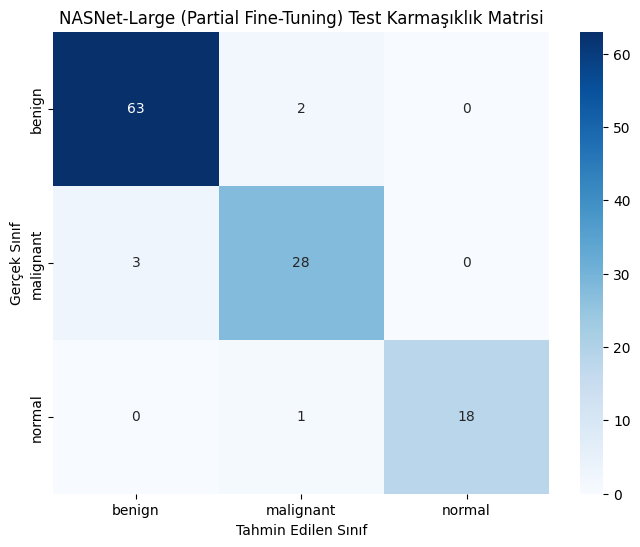


--- Tabloya Eklenecek Sonuçlar ---

NASNet-Large (Partial Fine-Tuning) | Accuracy: 0.9478 | Recall: 0.9399 | Precision: 0.9526 | F1-Score: 0.9460

Karmaşıklık Matrisi (nasnet_partial_fine_tune_confusion_matrix.png) oluşturuldu.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- KRİTİK DEĞİŞKENLER (Önceki hücrelerle aynı olmalı) ---
# DATA_ROOT = "/content/"
# IMAGE_SIZE = (224, 224)
# BATCH_SIZE = 32

# --- 1. TEST VERİ YÜKLEYİCİSİ (Normalizasyon: 0-1) ---
datagen_test = ImageDataGenerator(rescale=1./255)

# Test generator'ı oluştur. Shuffle=False kritik!
test_generator = datagen_test.flow_from_directory(
    DATA_ROOT + 'test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Sınıfları doğru eşleştirmek için KARŞTIRMA KAPALI olmalı
)

# --- 2. TAHMİN VE METRİK HESAPLAMA ---

print("\n--- NASNet (Partial Fine-Tuning) TEST SETİ Metrikleri Hesaplanıyor ---\n")

test_steps = int(np.ceil(test_generator.samples / BATCH_SIZE))
y_pred_proba_test = model.predict(test_generator, steps=test_steps)
y_pred_test = y_pred_proba_test.argmax(axis=1) # Olasılıklardan en yüksek olanın indeksini al
y_true_test = test_generator.classes # Gerçek etiketleri al

# Sınıf isimlerini al (Örn: benign, malignant, normal)
class_labels = list(test_generator.class_indices.keys())

# Metrikler
accuracy_test = accuracy_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test, average='macro', zero_division=0)
precision_test = precision_score(y_true_test, y_pred_test, average='macro', zero_division=0)
f1_test = f1_score(y_true_test, y_pred_test, average='macro', zero_division=0)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Recall (Duyarlılık): {recall_test:.4f}")
print(f"Test Precision (Kesinlik): {precision_test:.4f}")
print(f"Test F1-Score: {f1_test:.4f}")

# --- 3. KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) OLUŞTURMA ---

cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('NASNet-Large (Partial Fine-Tuning) Test Karmaşıklık Matrisi')
plt.savefig('nasnet_partial_fine_tune_confusion_matrix.png')
plt.show()

print("\n--- Tabloya Eklenecek Sonuçlar ---\n")
print(f"NASNet-Large (Partial Fine-Tuning) | Accuracy: {accuracy_test:.4f} | Recall: {recall_test:.4f} | Precision: {precision_test:.4f} | F1-Score: {f1_test:.4f}")
print("\nKarmaşıklık Matrisi (nasnet_partial_fine_tune_confusion_matrix.png) oluşturuldu.")

In [14]:
import numpy as np
import os
from PIL import Image

# --- PARAMETRELER (Önceki Denemelerden Alınan) ---
# Modelinize öğretilen sınıf etiketleri (Confusion Matrix'teki sıraya göre):
CLASS_LABELS = ['benign', 'malignant', 'normal']
TARGET_SIZE = (224, 224)
LOCAL_DIR = "/content/"
IMAGE_FILENAMES = ['000001.png', '000002.png','000023.png','000024.png','000053.png','000054.png','000304.png','000305.png','000306.png','000307.png','000308.png','000309.png']

print(f"Toplam {len(IMAGE_FILENAMES)} dosya üzerinde tahmin yapılıyor...\n")

results = []

for filename in IMAGE_FILENAMES:
    file_path = os.path.join(LOCAL_DIR, filename)

    # 1. Dosyanın varlığını kontrol et
    if not os.path.exists(file_path):
        results.append(f"HATA: {filename} dosyası {LOCAL_DIR} içinde bulunamadı.")
        continue

    try:
        # 2. Görüntüyü yükle ve RGB'ye çevir
        img = Image.open(file_path).convert("RGB")

        # 3. Yeniden boyutlandır ve normalleştir
        img = img.resize(TARGET_SIZE)
        img_array = np.array(img).astype('float32') / 255.0 # 0-1 Normalizasyonu

        # 4. Batch boyutunu ekle (1, 224, 224, 3)
        img_array = np.expand_dims(img_array, axis=0)

        # 5. Tahmin yap
        predictions = model.predict(img_array, verbose=0)

        # 6. Sonuçları al
        predicted_index = np.argmax(predictions[0])
        predicted_class = CLASS_LABELS[predicted_index]
        confidence = predictions[0][predicted_index] * 100

        results.append({
            'file': filename,
            'prediction': predicted_class.upper(),
            'confidence': f"{confidence:.2f}%"
        })

    except Exception as e:
        results.append(f"HATA: {filename} işlenirken beklenmedik hata oluştu: {e}")

# --- SONUÇLARI YAZDIRMA ---

print("---------------------------------")
print("NASNet (Partial Fine-Tuning) TAHMİNLERİ")
print("---------------------------------")

for item in results:
    if isinstance(item, dict):
        print(f"Dosya: {item['file']}")
        print(f"  Tahmin: {item['prediction']} (Kesinlik: {item['confidence']})")
    else:
        print(item)

print("---------------------------------")

Toplam 12 dosya üzerinde tahmin yapılıyor...

---------------------------------
NASNet (Partial Fine-Tuning) TAHMİNLERİ
---------------------------------
Dosya: 000001.png
  Tahmin: BENIGN (Kesinlik: 100.00%)
Dosya: 000002.png
  Tahmin: BENIGN (Kesinlik: 100.00%)
Dosya: 000023.png
  Tahmin: BENIGN (Kesinlik: 99.45%)
Dosya: 000024.png
  Tahmin: BENIGN (Kesinlik: 97.66%)
Dosya: 000053.png
  Tahmin: MALIGNANT (Kesinlik: 97.20%)
Dosya: 000054.png
  Tahmin: NORMAL (Kesinlik: 94.91%)
Dosya: 000304.png
  Tahmin: BENIGN (Kesinlik: 70.76%)
Dosya: 000305.png
  Tahmin: MALIGNANT (Kesinlik: 58.31%)
Dosya: 000306.png
  Tahmin: MALIGNANT (Kesinlik: 100.00%)
Dosya: 000307.png
  Tahmin: NORMAL (Kesinlik: 70.11%)
Dosya: 000308.png
  Tahmin: BENIGN (Kesinlik: 96.54%)
Dosya: 000309.png
  Tahmin: MALIGNANT (Kesinlik: 97.20%)
---------------------------------
